<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/GRU_Model_(TensorFlow)_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 LSTM Model (TensorFlow) IMDB Dataset**

# Install Library

In [1]:
!pip install tensorflow matplotlib scikit-learn seaborn --quiet

# Import Library

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset IMDB

In [3]:
num_words = 30000
maxlen = 300
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Arsitektur GRU TensorFlow

In [ ]:
class GRUModel(tf.keras.Model):
    def __init__(self, num_words, maxlen):
        super(GRUModel, self).__init__()
        self.embedding = tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen)
        self.gru1 = tf.keras.layers.GRU(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)
        self.gru2 = tf.keras.layers.GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)
        self.gru3 = tf.keras.layers.GRU(64, dropout=0.3, recurrent_dropout=0.2)
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.3)
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.3)
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.gru1(x)
        x = self.gru2(x)
        x = self.gru3(x)
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        return self.output_layer(x)

model = GRUModel(num_words, maxlen)
model.build(input_shape=(None, maxlen))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Training Model

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1606s 5s/step - accuracy: 0.6655 - loss: 0.5847 - val_accuracy: 0.8072 - val_loss: 0.4325
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1646s 5s/step - accuracy: 0.8668 - loss: 0.3158 - val_accuracy: 0.8606 - val_loss: 0.3218
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1633s 5s/step - accuracy: 0.9321 - loss: 0.1746 - val_accuracy: 0.8808 - val_loss: 0.3251
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1654s 5s/step - accuracy: 0.9722 - loss: 0.0804 - val_accuracy: 0.8706 - val_loss: 0.3650
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1632s 5s/step - accuracy: 0.9869 - loss: 0.0434 - val_accuracy: 0.8498 - val_loss: 0.5023


# Menampilkan Contoh Prediksi Model

In [9]:
for i in range(5):
    print(f"Contoh ke-{i+1} => Prediksi: {'Positif' if y_pred[i] else 'Negatif'}, Label Asli: {'Positif' if y_test[i] else 'Negatif'}")

Contoh ke-1 => Prediksi: Negatif, Label Asli: Negatif
Contoh ke-2 => Prediksi: Positif, Label Asli: Positif
Contoh ke-3 => Prediksi: Positif, Label Asli: Positif
Contoh ke-4 => Prediksi: Negatif, Label Asli: Negatif
Contoh ke-5 => Prediksi: Positif, Label Asli: Positif


# Evaluasi Akurasi, Presisi, Recall, F1 Squared, AUC dan ROC

In [6]:
y_prob = model.predict(x_test).flatten()
y_pred = (y_prob >= 0.5).astype(int)

accuracy = np.mean(y_pred == y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC:", auc_score)

782/782 ━━━━━━━━━━━━━━━━━━━━ 506s 641ms/step
Akurasi: 0.85664
Presisi: 0.8544847328244275
Recall: 0.85968
F1-Score: 0.8570744935396395
AUC: 0.9313320288


# Visualisasi

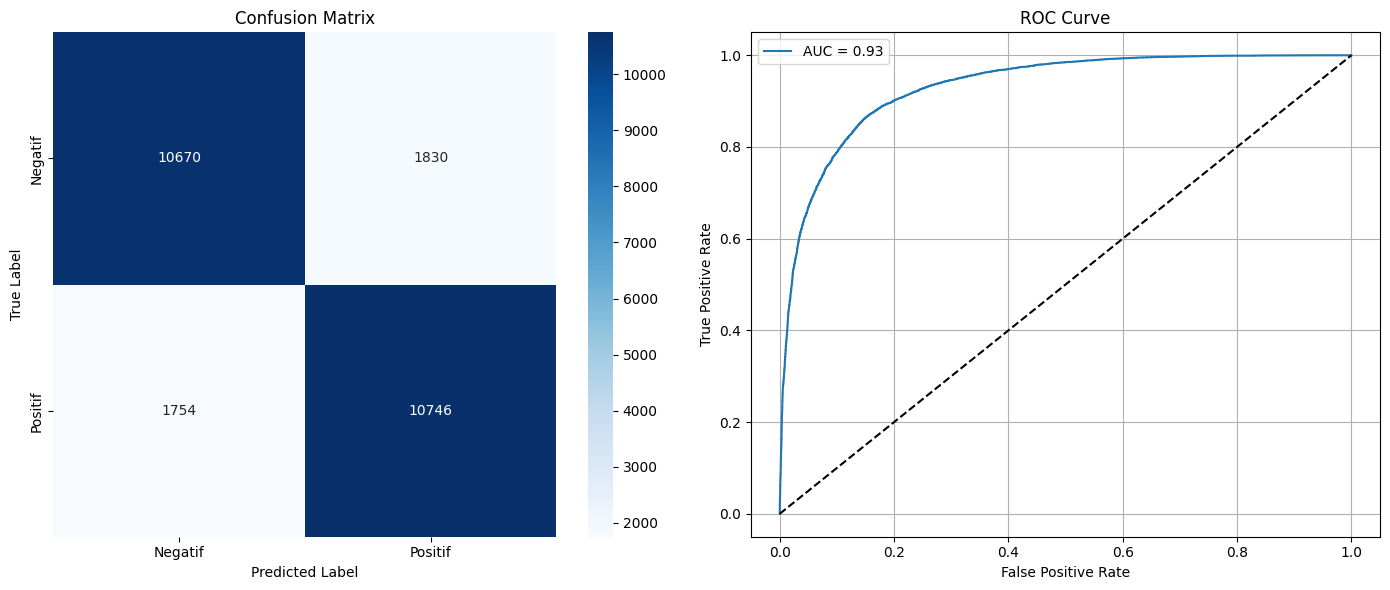

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=axes[0])
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
axes[0].set_title("Confusion Matrix")

axes[1].plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

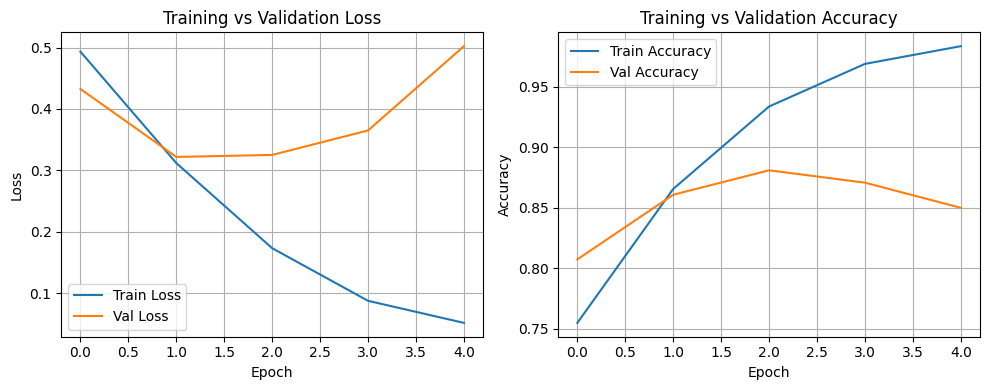

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()